# Projeto de IA - Evaluation Car

# Pré-procesamento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_data = pd.read_csv('Dataset_Car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safery', 'class'])

In [3]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safery,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car_data.describe()

,buying,maint,doors,persons,lug_boot,safery,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
car_data.shape

(1728, 7)

In [6]:
car_data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

<AxesSubplot:>

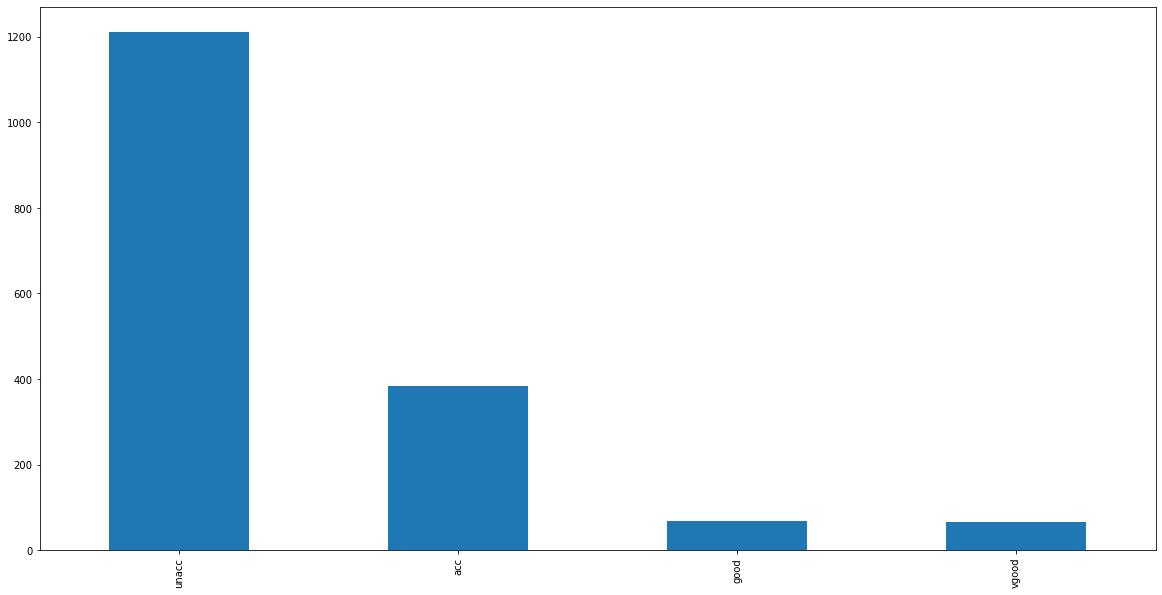

In [7]:
car_data['class'].value_counts().plot(kind='bar', figsize=(20,10))

C:\Users\Fernanda Mello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

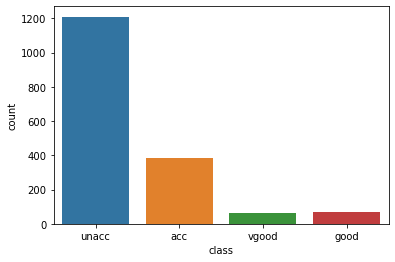

In [8]:
sns.countplot(car_data['class'])

In [9]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safery', 'class'], dtype='object')

In [10]:
car_data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safery      object
class       object
dtype: object

<AxesSubplot:ylabel='class'>

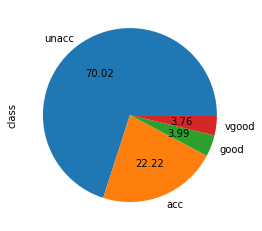

In [11]:
car_data['class'].value_counts().plot.pie(autopct='%.2f')

# LABEL ENCONDER

In [12]:
from sklearn import preprocessing

In [13]:
buying_label = {ni: n for n, ni in enumerate(set(car_data['buying']))}
maint_label = {ni: n for n, ni in enumerate(set(car_data['maint']))}
doors_label = {ni: n for n, ni in enumerate(set(car_data['doors']))}
persons_label = {ni: n for n, ni in enumerate(set(car_data['persons']))}
lug_boot_label = {ni: n for n, ni in enumerate(set(car_data['lug_boot']))}
safery_label = {ni: n for n, ni in enumerate(set(car_data['safery']))}
class_label = {ni: n for n, ni in enumerate(set(car_data['class']))}

In [14]:
buying_label

{'high': 0, 'med': 1, 'low': 2, 'vhigh': 3}

In [15]:
car_label=car_data

In [16]:
car_label.head()

,buying,maint,doors,persons,lug_boot,safery,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
car_label['buying']=car_label['buying'].map(buying_label)
car_label['maint']=car_label['maint'].map(maint_label)
car_label['doors']=car_label['doors'].map(doors_label)
car_label['persons']=car_label['persons'].map(persons_label)
car_label['lug_boot']=car_label['lug_boot'].map(lug_boot_label)
car_label['safery']=car_label['safery'].map(safery_label)
car_label['class']=car_label['class'].map(class_label)

In [18]:
car_label.head()

,buying,maint,doors,persons,lug_boot,safery,class
0,3,3,1,1,1,2,0
1,3,3,1,1,1,1,0
2,3,3,1,1,1,0,0
3,3,3,1,1,2,2,0
4,3,3,1,1,2,1,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lb = LabelEncoder()

In [21]:
car_label.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safery      int64
class       int64
dtype: object

<AxesSubplot:>

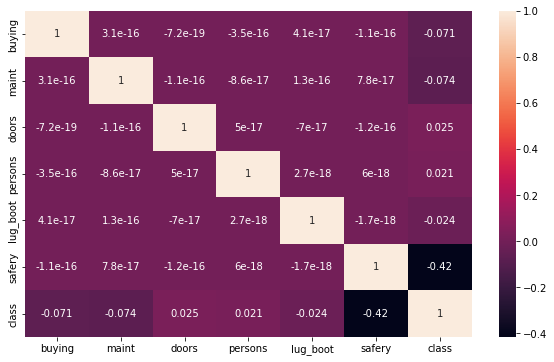

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(car_label.corr(),annot=True)

In [23]:
car_label.describe()

,buying,maint,doors,persons,lug_boot,safery,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.784144
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,1.258322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [24]:
Xfeatures = car_label[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safery']]
ylabels = car_label['class']

# Balanceamento

In [25]:
from imblearn.over_sampling import SMOTE 

In [26]:
X = car_label.drop(['class'], axis=1)
y = car_label['class'] 

In [27]:
sm = SMOTE()
X_sm, y_sm = sm.fit_sample(X.astype('float'),y)

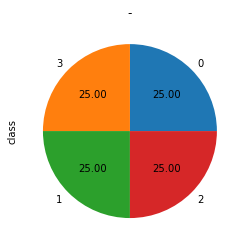

In [28]:
ax = y_sm.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("-")

In [29]:
y_sm.shape

(4840,)

# Treinamento e teste

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2)

In [32]:
X_train.shape

(3872, 6)

In [33]:
X_test.shape

(968, 6)

In [34]:
clf = svm.SVC (gamma='auto')

In [35]:
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [36]:
score = clf.score(X_test, y_test)

In [37]:
print("Acurácia nos Dados de teste: %.3f%%" % (score*100))

Acurácia nos Dados de teste: 94.731%


# Escolha de Melhor Modelo

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()

In [52]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
print(rfc.score(X_test,y_test))

0.984504132231405


In [54]:
y_pred=clf.predict(X_test)

# Validação Cruzada

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [56]:
cv = KFold(n_splits = 5, shuffle = True)

In [66]:
results = cross_val_score(rfc, X_train, y_train, cv = cv, scoring = 'accuracy')

In [67]:
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))

In [68]:
intervalo(results)

Acurácia média: 99.17%
Intervalo de acurácia: [98.91% ~ 99.44%]


# Variação de Hiperparâmetro

In [74]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Number of trees in random forest
n_estimators = [100, 150, 200]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Method of selecting samples for training each tree
bootstrap = [True, False]

# The function to measure the quality of a split.
criterion = ['gini', 'entropy']

In [81]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap,
               'criterion':criterion
}

In [93]:
gscv = GridSearchCV(rfc, parameters)

In [85]:
clf = cross_val_score(gscv, X_train, y_train, scoring='accuracy')

In [88]:
def intervalo(clf):
    mean = clf.mean()
    dv = clf.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))

In [89]:
intervalo(clf)

Acurácia média: 99.02%
Intervalo de acurácia: [98.81% ~ 99.22%]


# Matriz confusão

In [95]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [97]:
y_pred = cross_val_predict(rfc, X_train, y_train, cv = cv)

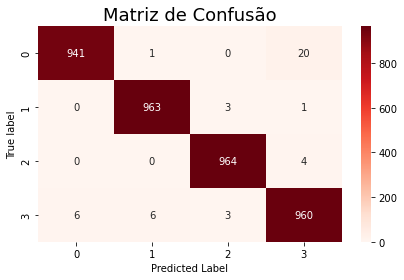

In [99]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [100]:
# Relatório do modelo
from sklearn.metrics import classification_report

In [101]:
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9937    0.9782    0.9859       962
           1     0.9928    0.9959    0.9943       967
           2     0.9938    0.9959    0.9948       968
           3     0.9746    0.9846    0.9796       975

    accuracy                         0.9886      3872
   macro avg     0.9887    0.9886    0.9887      3872
weighted avg     0.9887    0.9886    0.9886      3872

